In [1]:
import sys
sys.path.insert(0,"/workspaces/deep_learning/Traffic_sign_classifier")
from pathlib import Path
from src.dataloader.data_module import GTSRBDataModule
from src.model.TrafficSignClassifierModule import TrafficSignClassifier
import lightning.pytorch as pl

In [2]:
model_path = Path("/workspaces/deep_learning/Traffic_sign_classifier/tb_logs/traffic_sign_classifier/version_1/checkpoints/epoch=49-step=24550.ckpt")
trainer = pl.Trainer(accelerator="gpu", devices=1)
model = TrafficSignClassifier.load_from_checkpoint(model_path)
data_module = GTSRBDataModule(Path("/data/GTSRB"), batch_size=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [3]:
out = trainer.predict(model,datamodule=data_module)

You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 12630/12630 [00:11<00:00, 1073.71it/s]


16 (32, 32, 3)
1 (32, 32, 3)
38 (32, 32, 3)
33 (32, 32, 3)
11 (32, 32, 3)


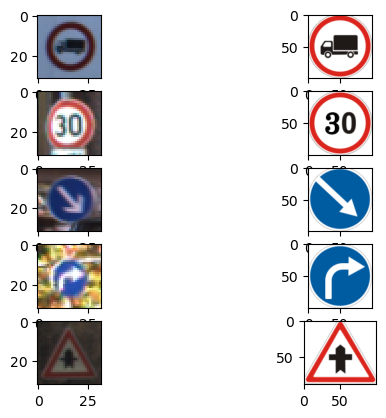

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

num_samples = 5
fig, ax = plt.subplots(nrows=num_samples, ncols=2)
for i in range(num_samples):
    img = out[i]['img'][0].permute(1,2,0).cpu().numpy()
    label = out[i]['label'].item()
    meta_file = Path(f"/data/GTSRB/Meta/{label}.png")
    label_img = Image.open(meta_file)
    ax[i,0].imshow(img)
    ax[i,1].imshow(label_img)
    print(label, img.shape)